In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('acs2017_county_data.csv')

In [3]:
df.head(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [4]:
df.describe

<bound method NDFrame.describe of       CountyId        State               County  TotalPop    Men   Women  \
0         1001      Alabama       Autauga County     55036  26899   28137   
1         1003      Alabama       Baldwin County    203360  99527  103833   
2         1005      Alabama       Barbour County     26201  13976   12225   
3         1007      Alabama          Bibb County     22580  12251   10329   
4         1009      Alabama        Blount County     57667  28490   29177   
...        ...          ...                  ...       ...    ...     ...   
3215     72145  Puerto Rico  Vega Baja Municipio     54754  26269   28485   
3216     72147  Puerto Rico    Vieques Municipio      8931   4351    4580   
3217     72149  Puerto Rico   Villalba Municipio     23659  11510   12149   
3218     72151  Puerto Rico    Yabucoa Municipio     35025  16984   18041   
3219     72153  Puerto Rico      Yauco Municipio     37585  18052   19533   

      Hispanic  White  Black  Native  ...

In [5]:
df.shape

(3220, 37)

In [6]:
df.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [7]:
df['State'].value_counts()

Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Puerto Rico              78
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Louisiana                64
Colorado                 64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico          

In [8]:
# alabama = df[df['State'] == 'Alabama']
# alabama
x=np.array(df['State'])

states = list(set(x))

In [9]:
male =[]
female = []
for i in states:
    temp = df[df['State'] == i]
    male.append(sum(temp['Men']))
    female.append(sum(temp['Women']))
    
    

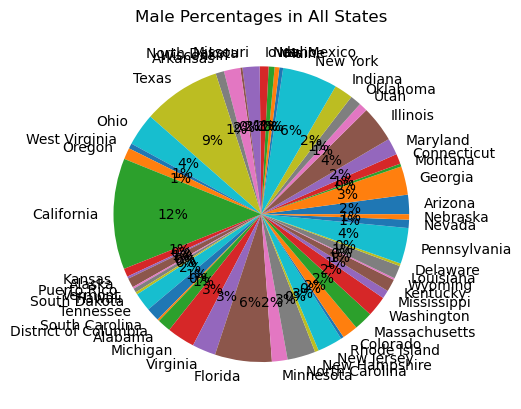

In [11]:
plt.title("Male Percentages in All States")
plt.pie(male,labels=states,autopct='%1.0f%%')
plt.show()

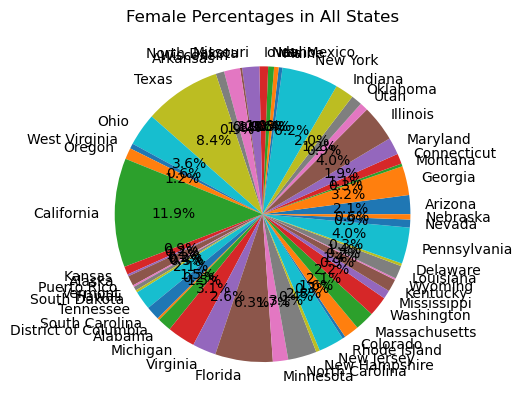

In [12]:
plt.title("Female Percentages in All States")
plt.pie(female,labels=states,autopct='%1.1f%%')
plt.show()

In [13]:
total =[]
Sex = ['Male', 'Female']
total.append(sum(male))
total.append(sum(female))

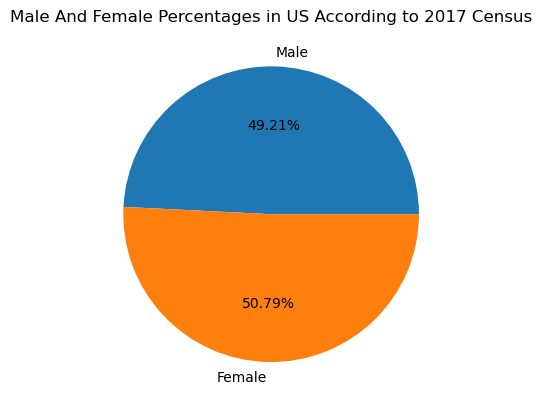

In [14]:
plt.title("Male And Female Percentages in US According to 2017 Census")
plt.pie(total,labels=Sex,autopct='%1.2f%%')
plt.show()

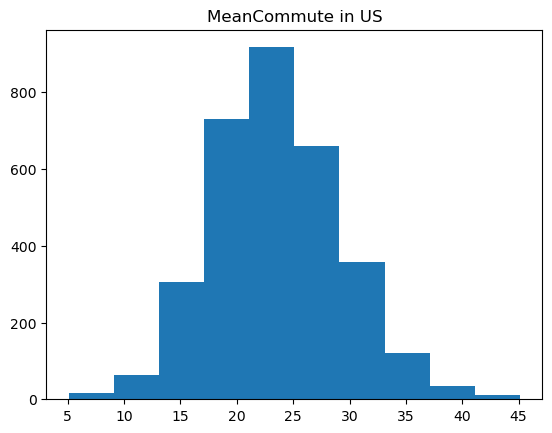

In [15]:
plt.title("MeanCommute in US")
plt.hist(df["MeanCommute"])
plt.show()

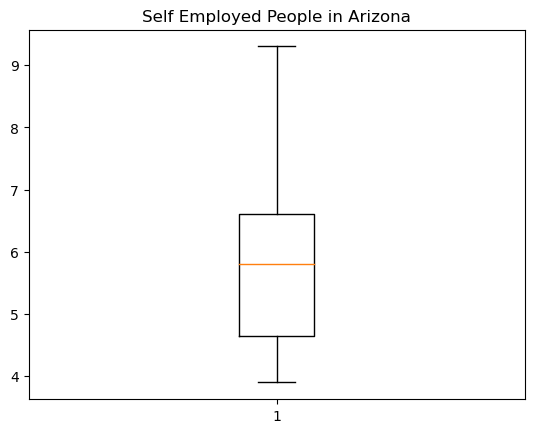

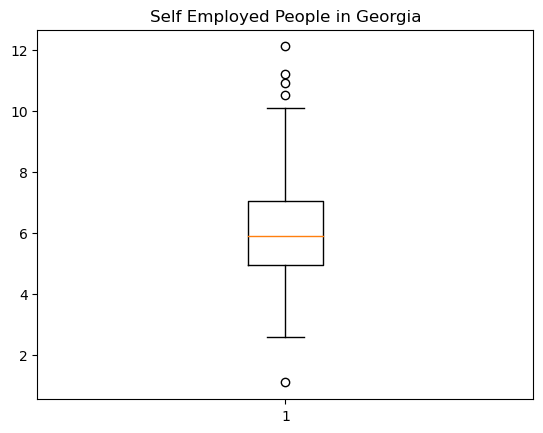

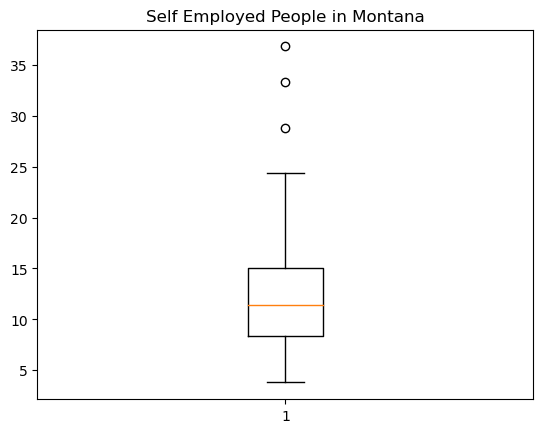

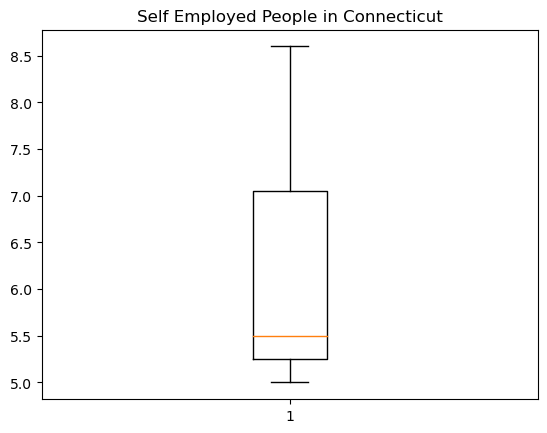

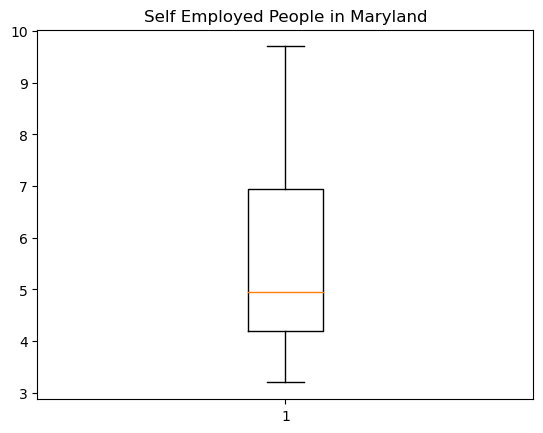

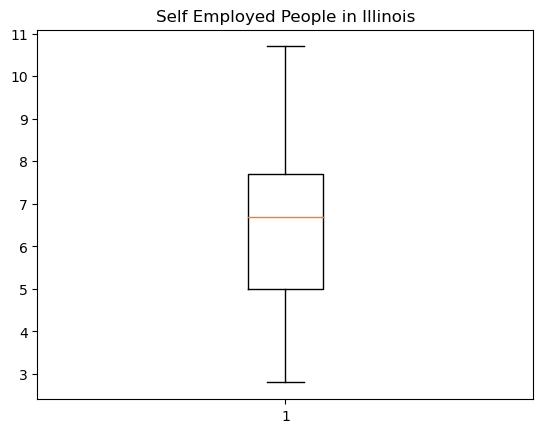

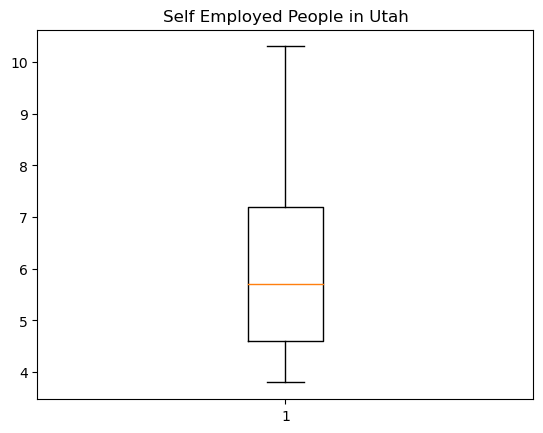

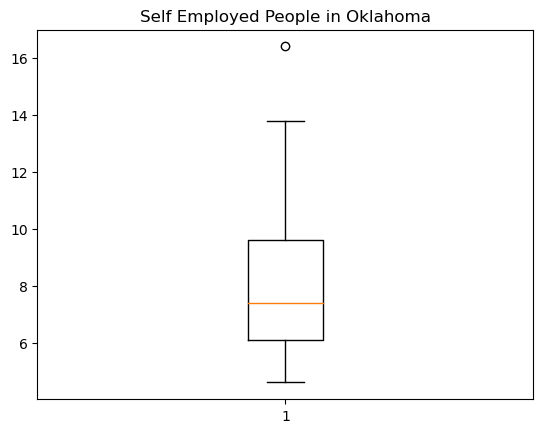

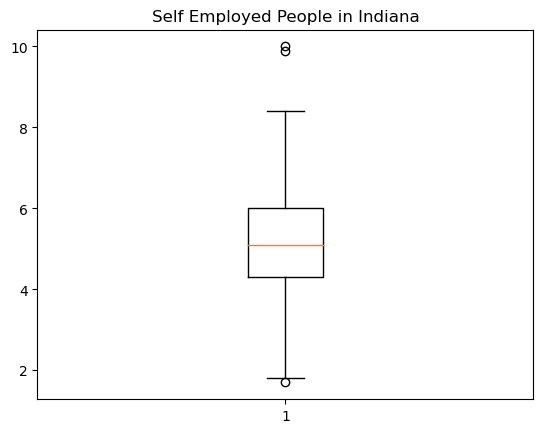

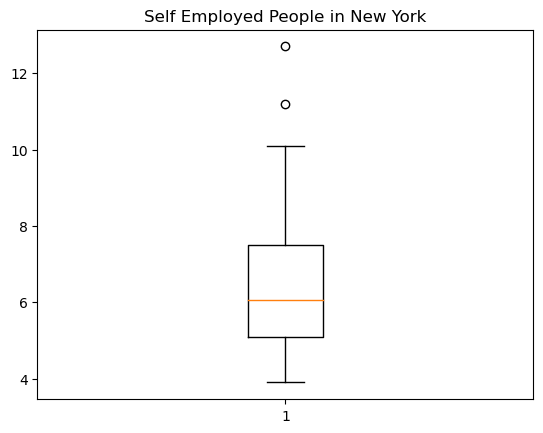

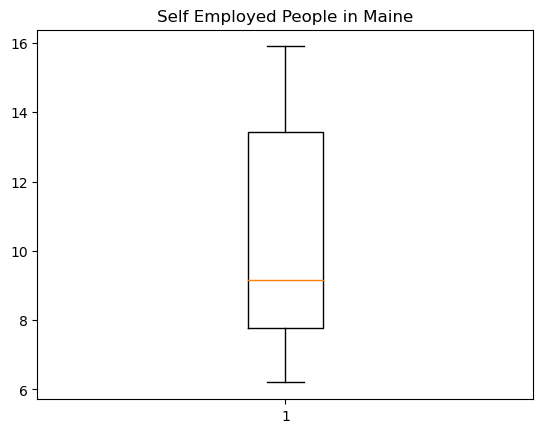

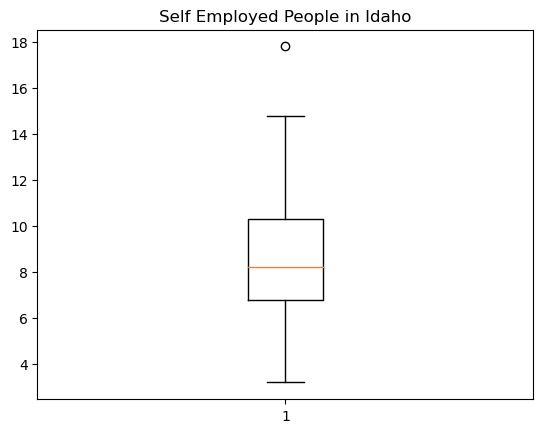

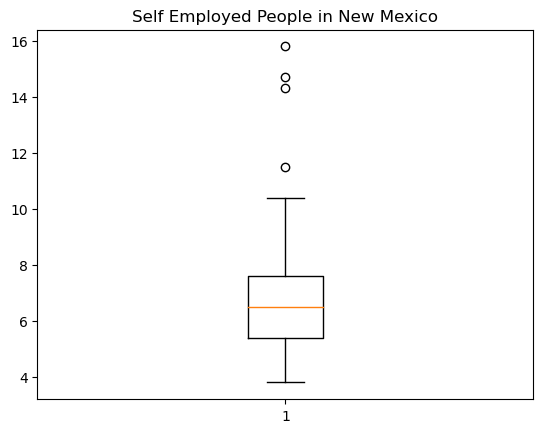

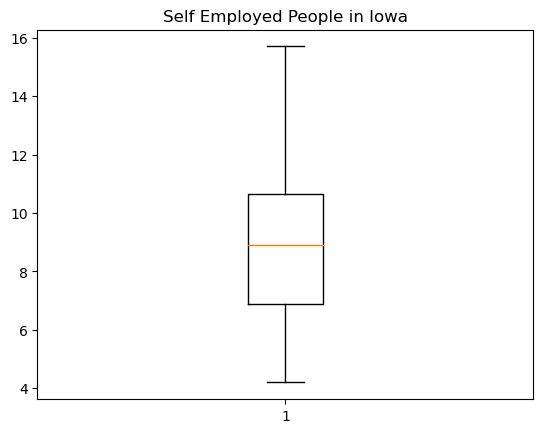

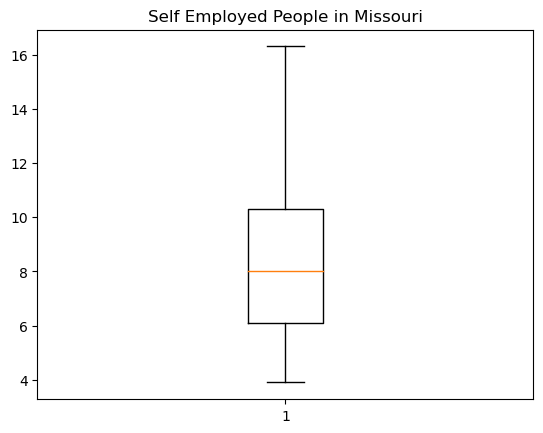

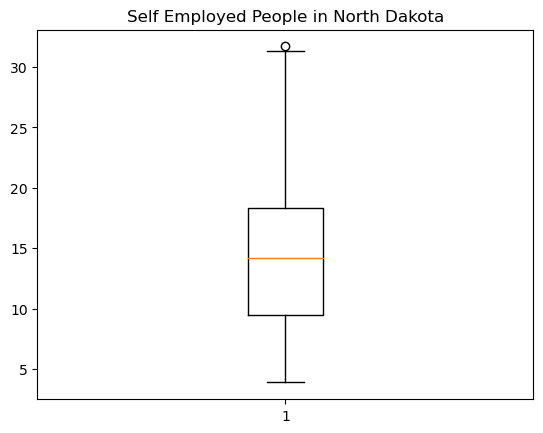

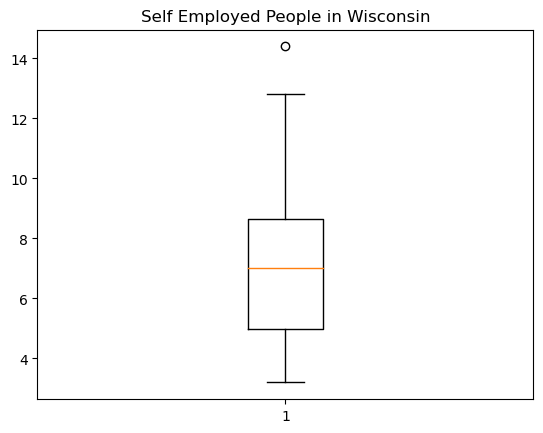

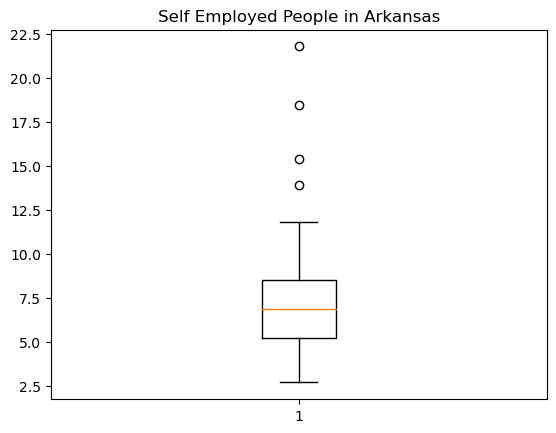

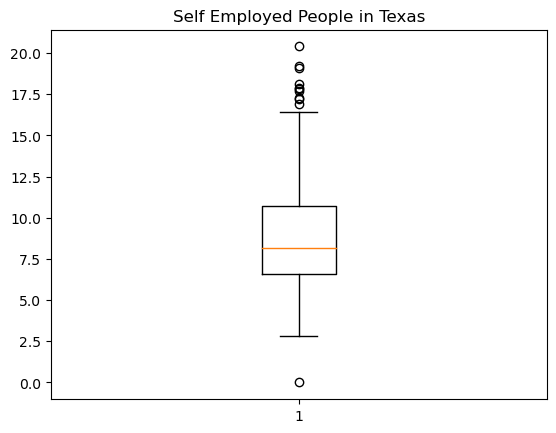

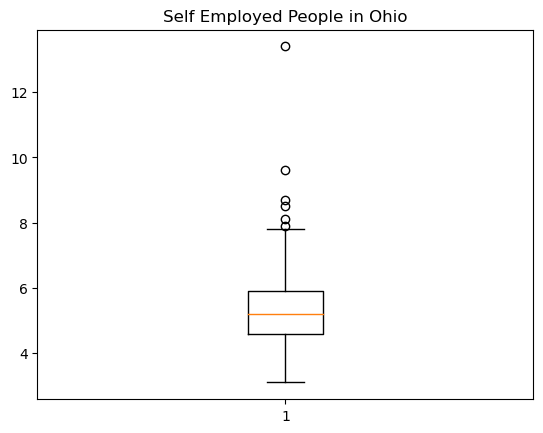

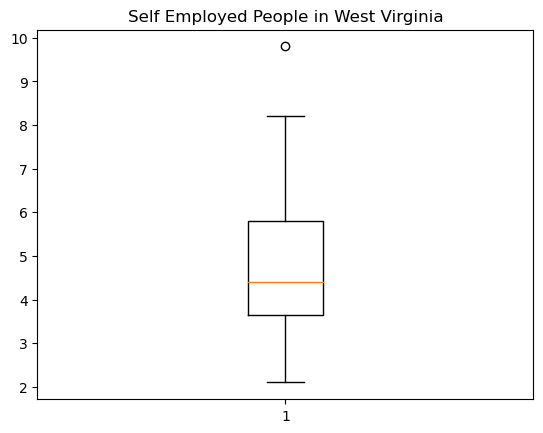

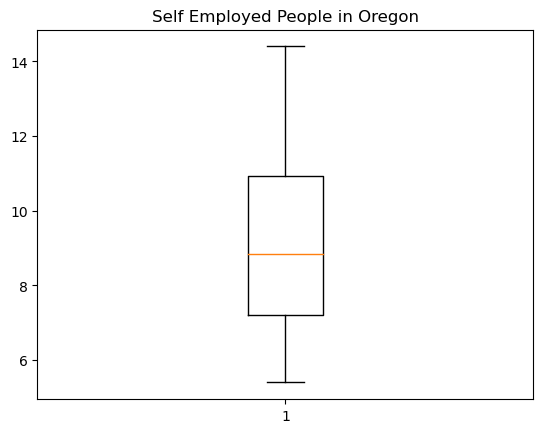

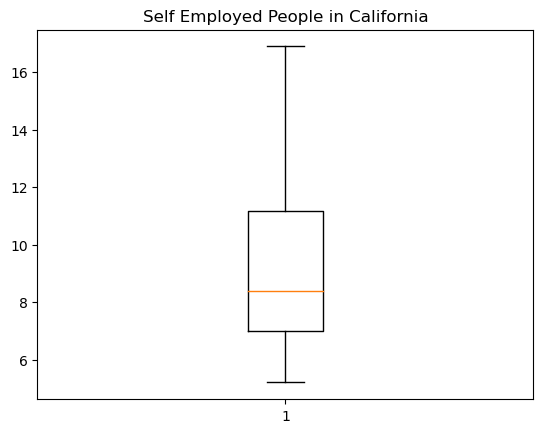

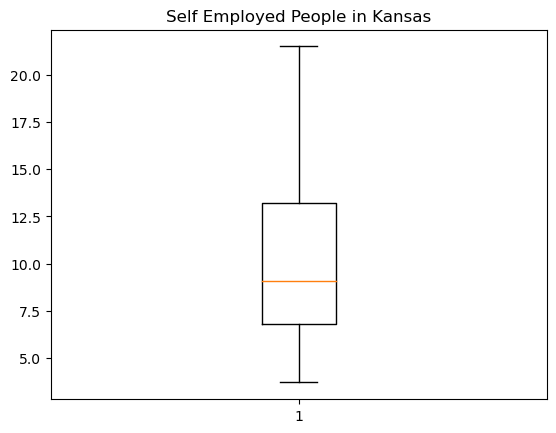

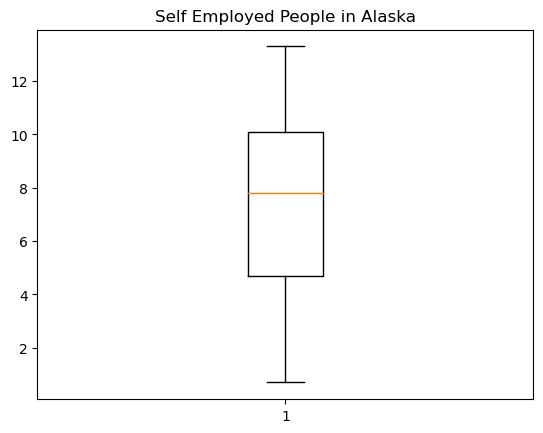

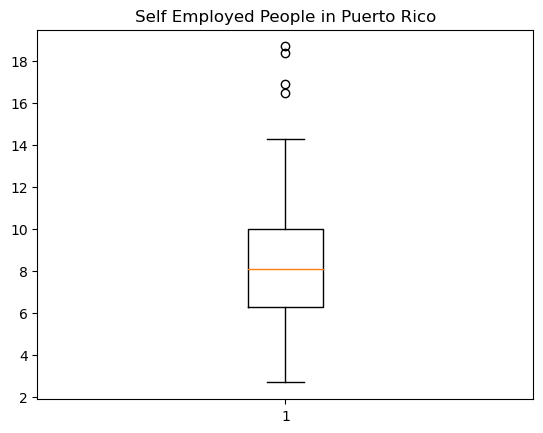

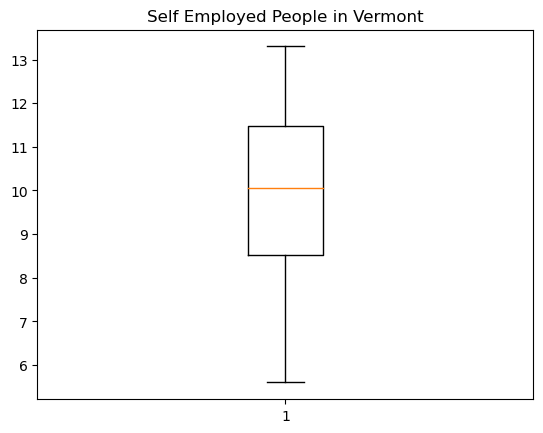

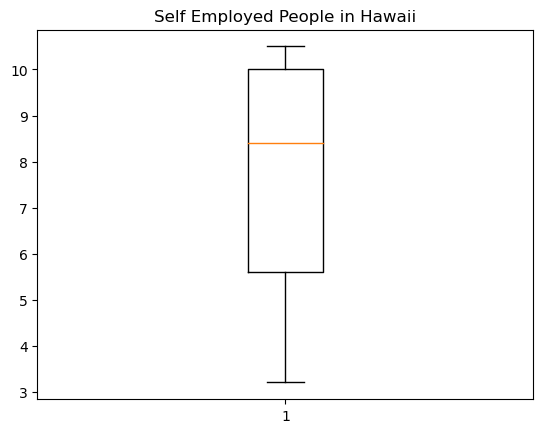

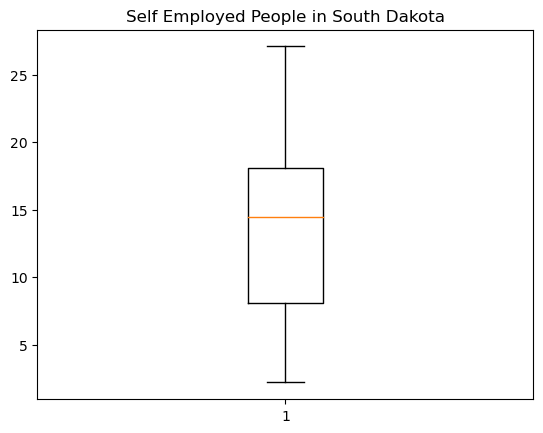

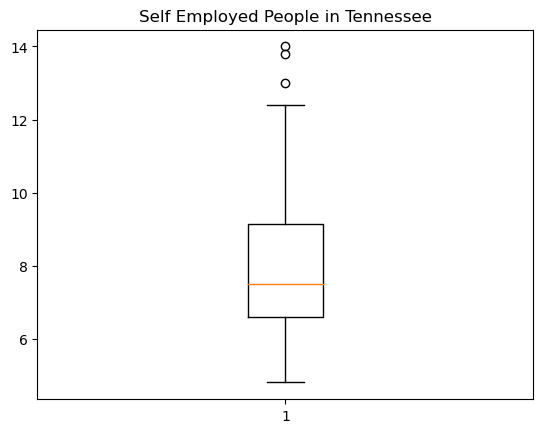

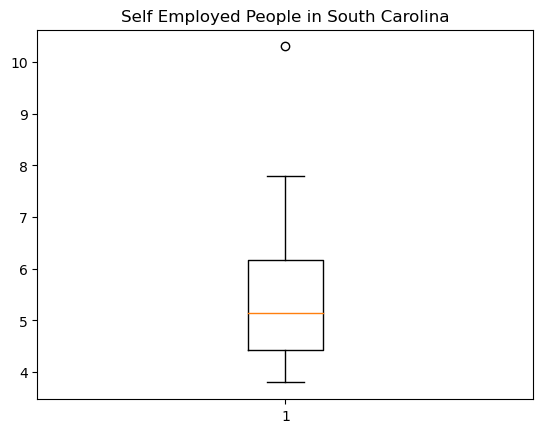

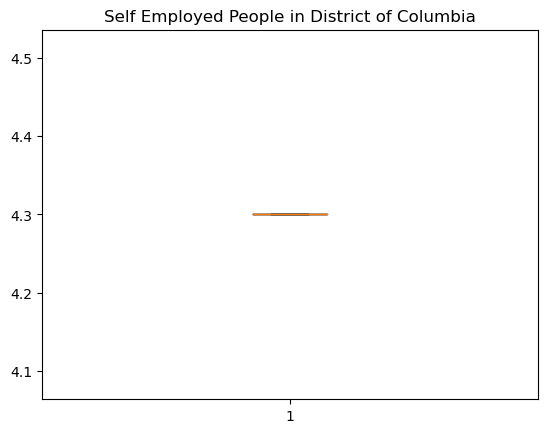

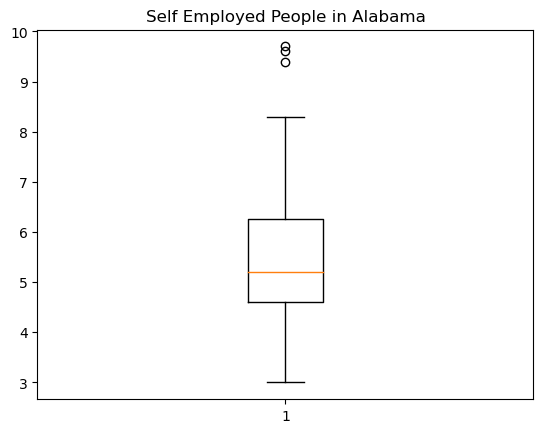

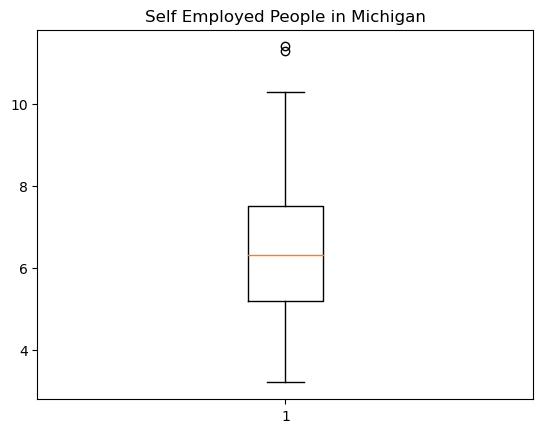

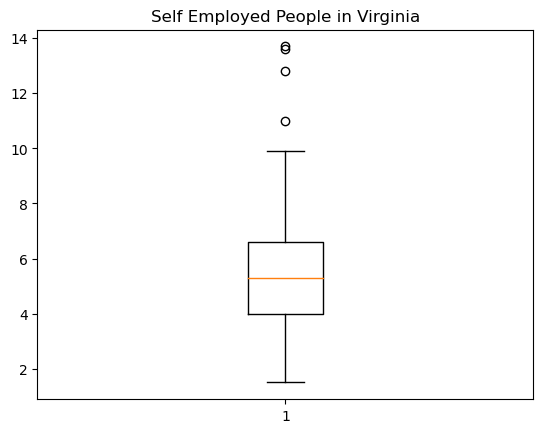

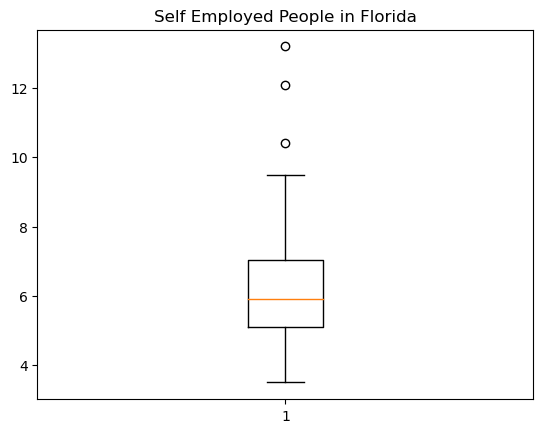

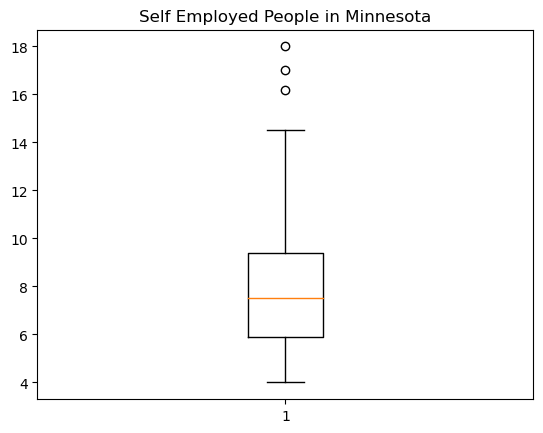

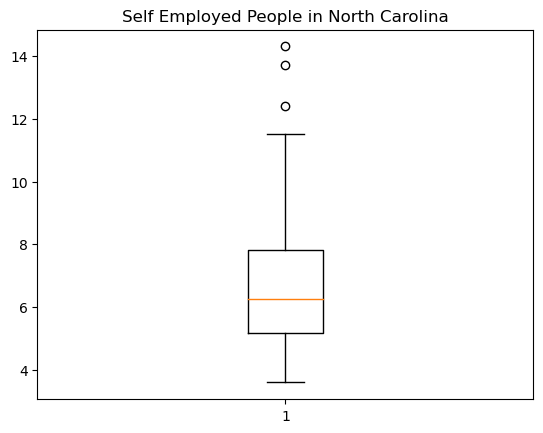

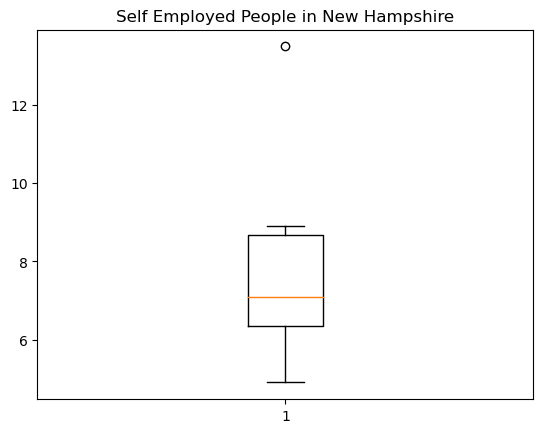

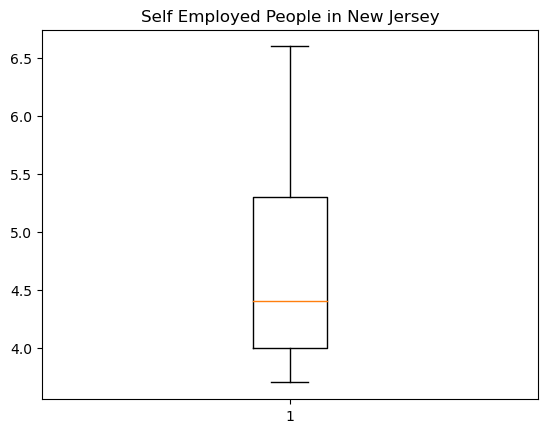

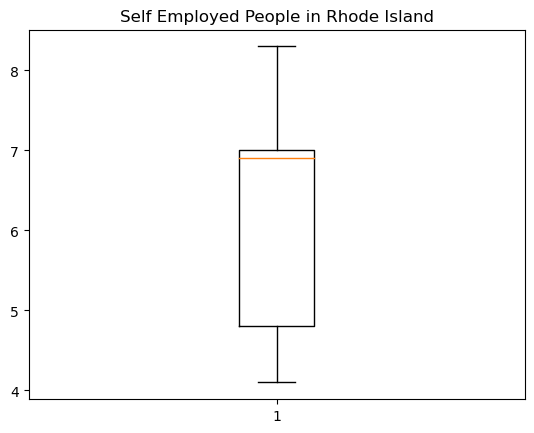

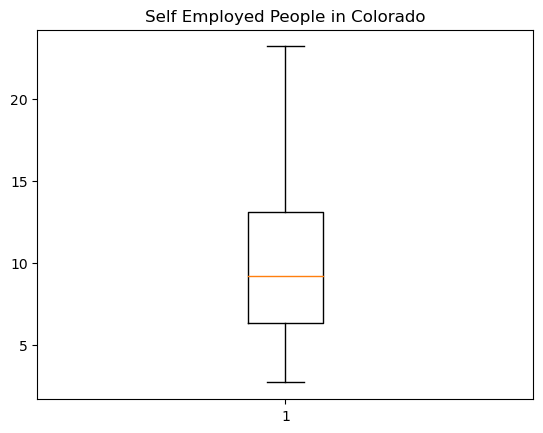

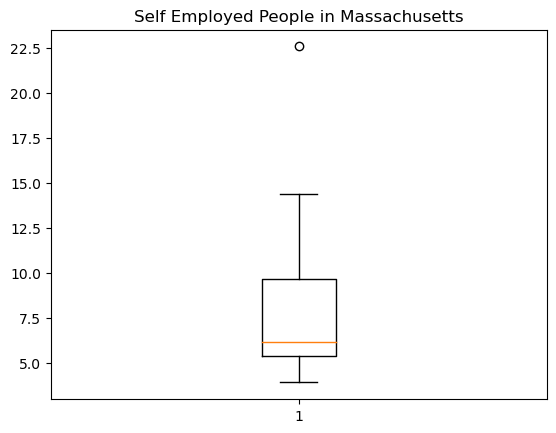

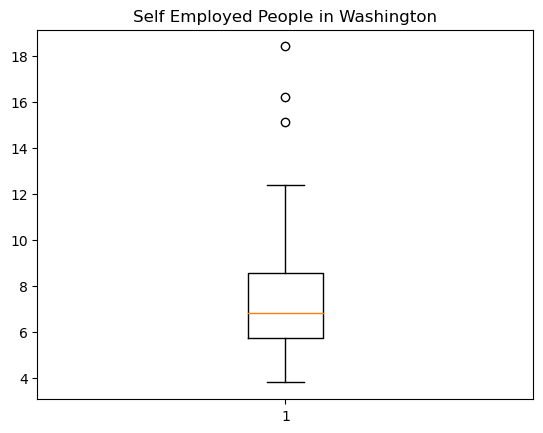

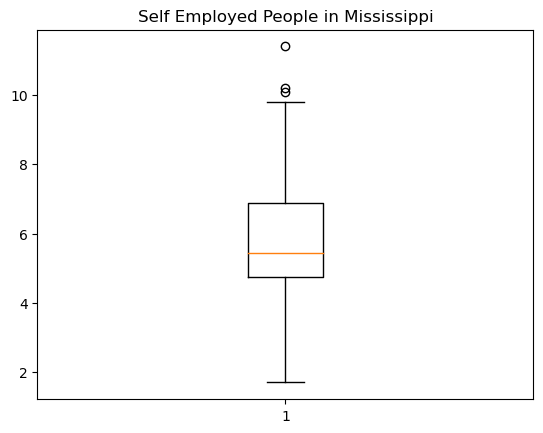

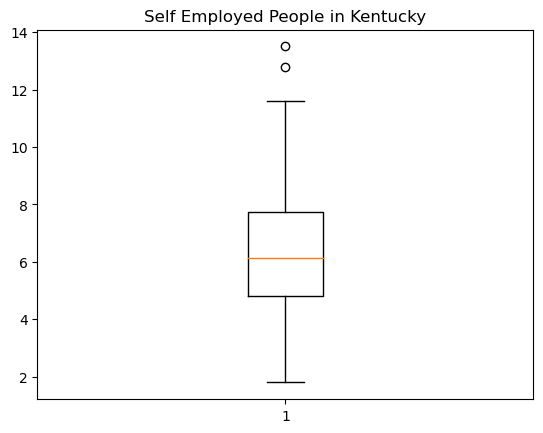

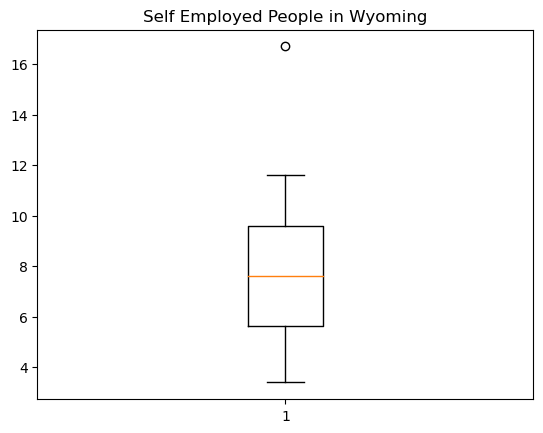

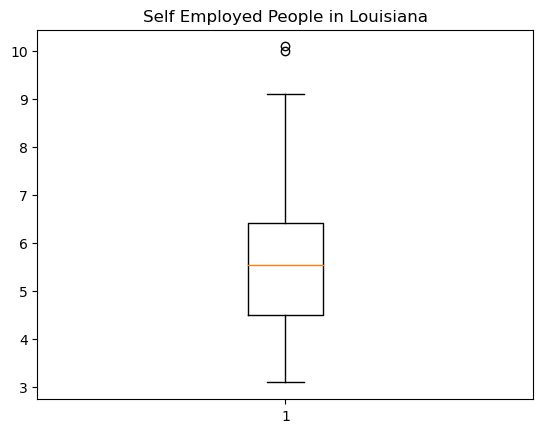

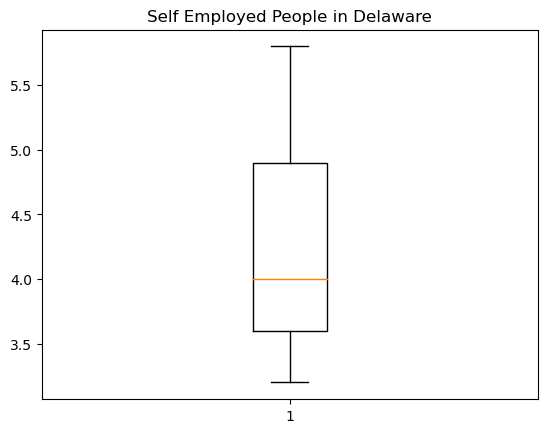

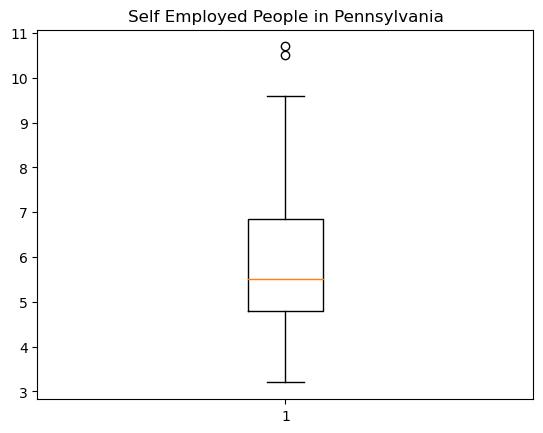

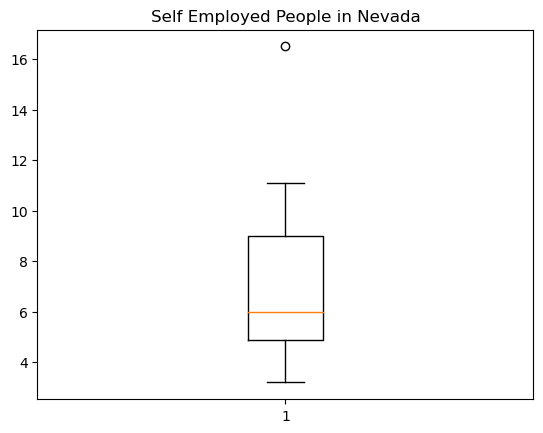

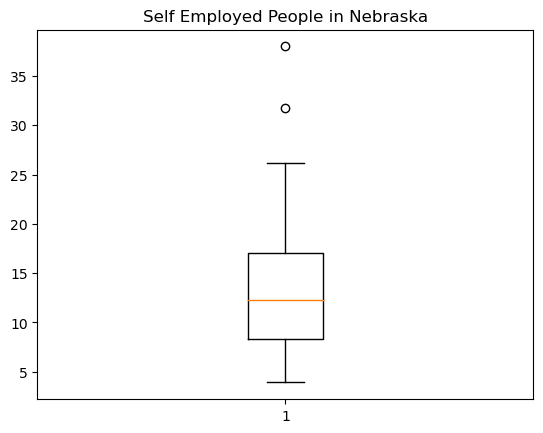

In [16]:
for i in states:
    
    plt.title(f"Self Employed People in {i}")
    z=df[df['State']==i]
    plt.boxplot(z["SelfEmployed"])
    plt.show()

In [17]:
import statsmodels.api as sm

In [18]:
temp1 = df[df["State"]=="Texas"]

In [19]:
dd= (temp1["Employed"] - temp1["Employed"].min()) / (temp1["Employed"].max() - temp1["Employed"].min())
# Calculate the ECDF
ecdf = sm.distributions.ECDF(dd)
x = np.linspace(min(dd), max(dd), num=100)
y = ecdf(x)

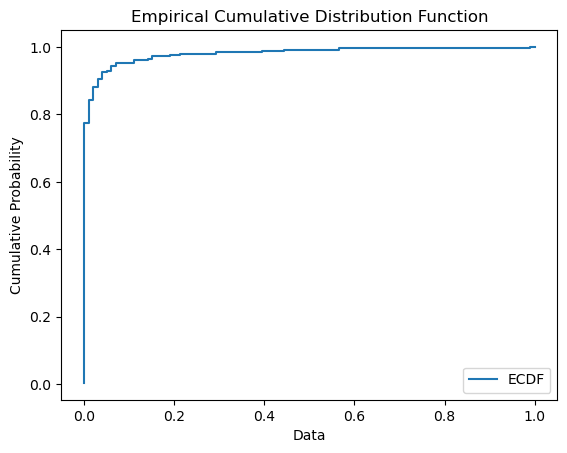

In [20]:
# Plot the ECDF
plt.step(x, y, label='ECDF')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function')
plt.legend()
plt.show()

In [21]:
# calculate correlation matrix
correlation_matrix = df.corr()

C:\Users\nauman.tasawar\AppData\Local\Temp\ipykernel_18928\2935050908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


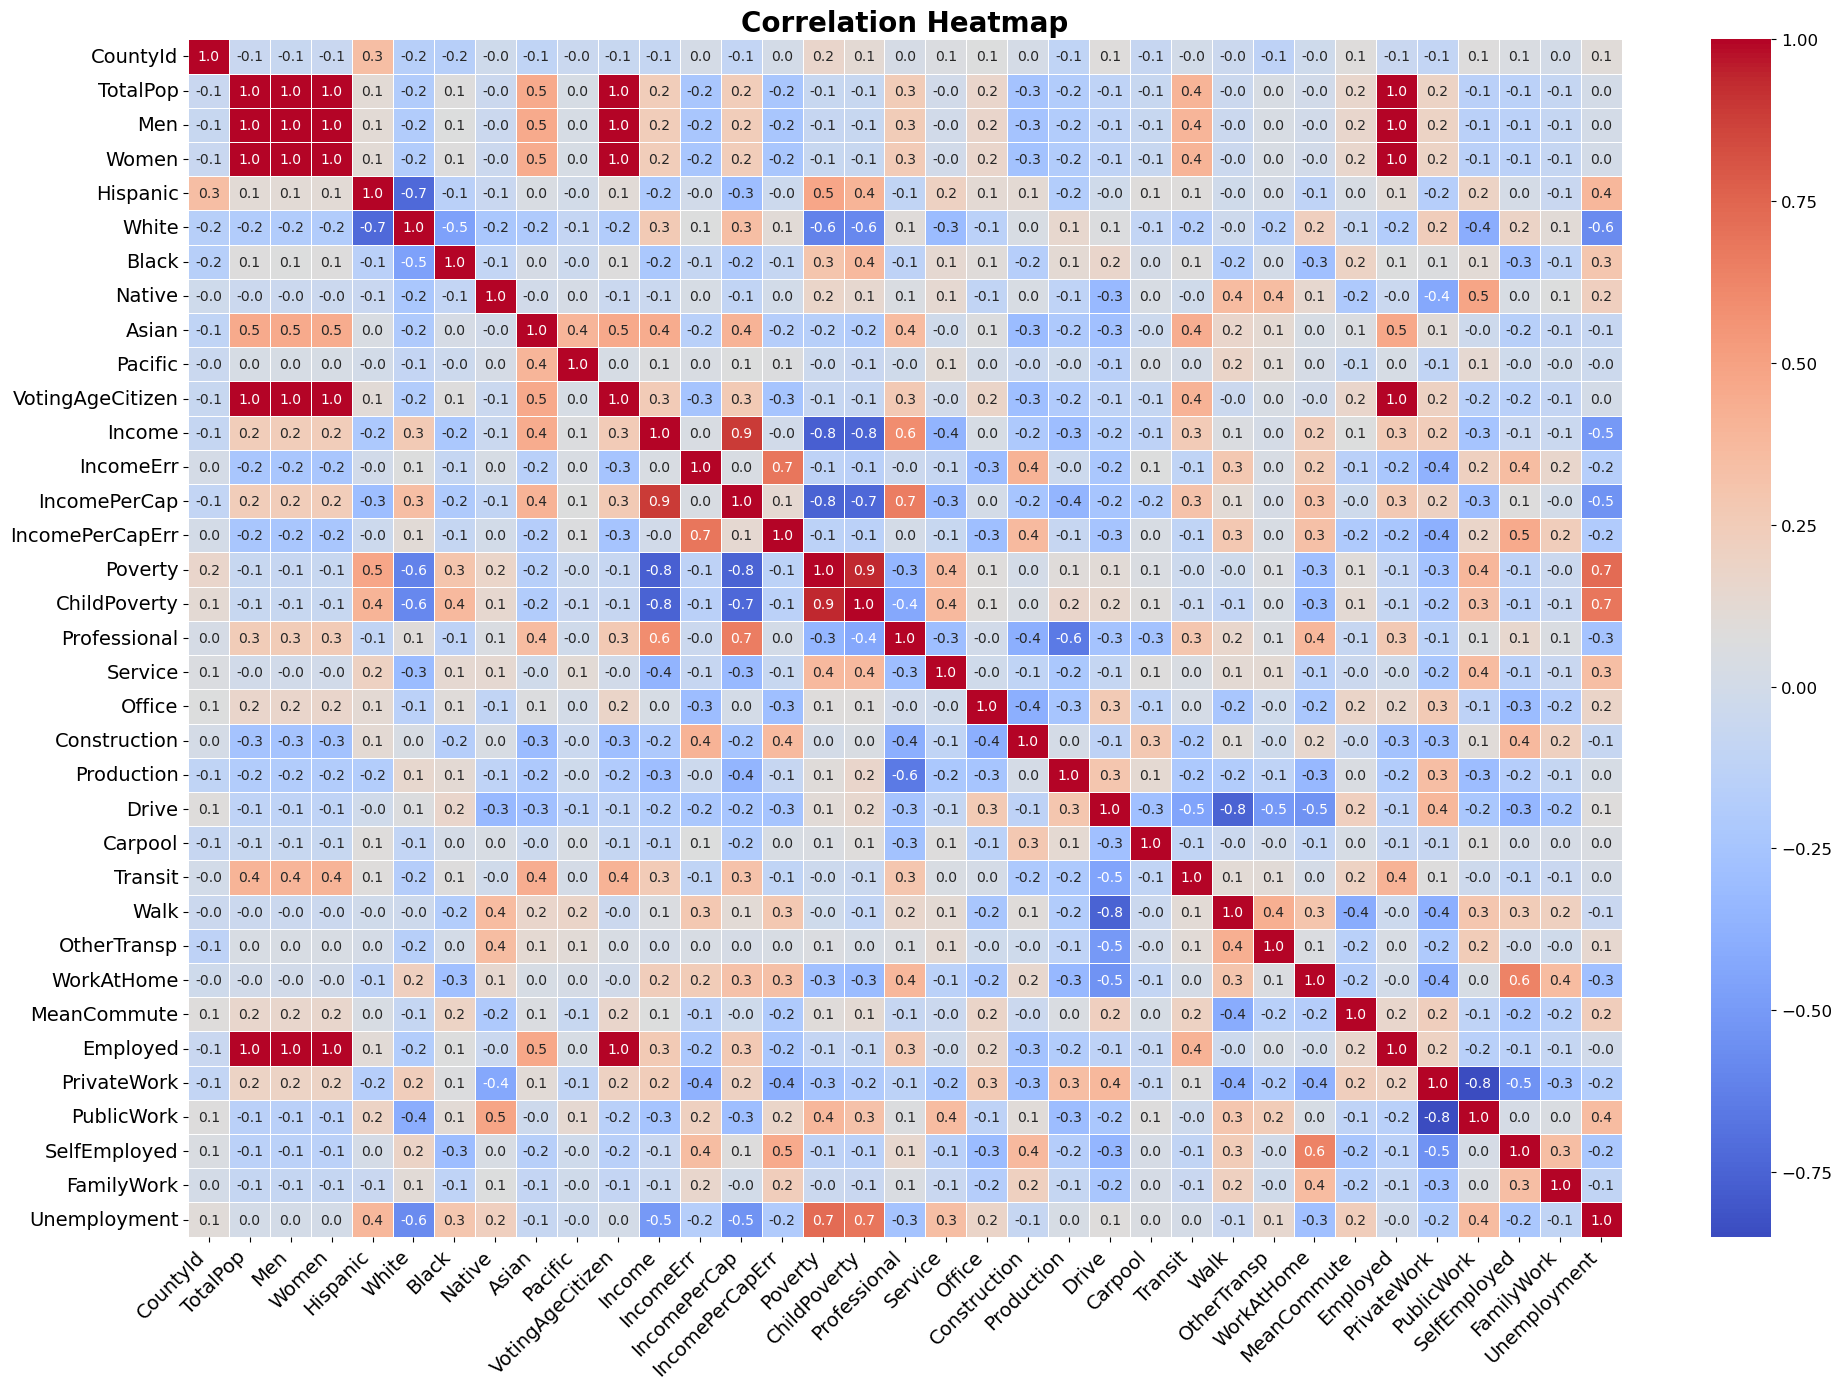

In [22]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(20, 14))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)

# increase font size of y-axis labels and title
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, fontsize=14)
plt.title("Correlation Heatmap", fontsize=20, fontweight='bold')

# adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=14)

# increase spacing between heatmap cells
plt.tight_layout()

# add color bar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.show()

# Population of races in each state of USA

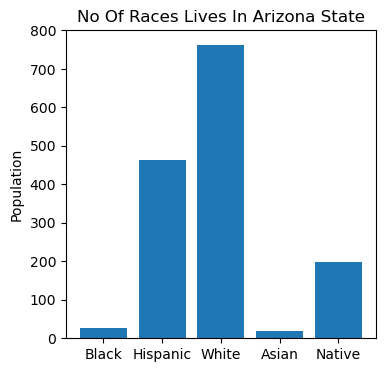

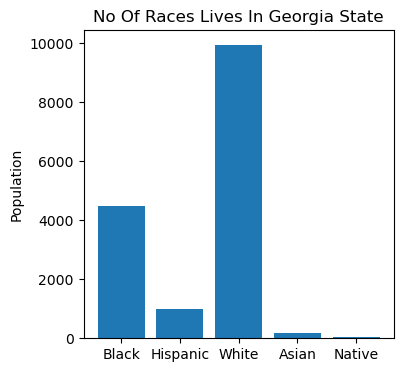

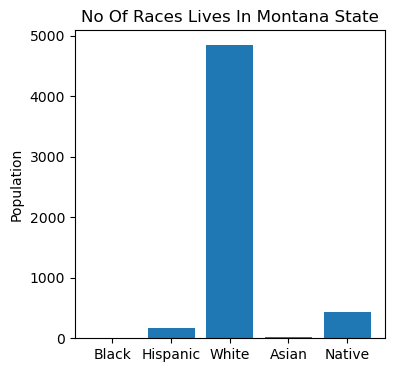

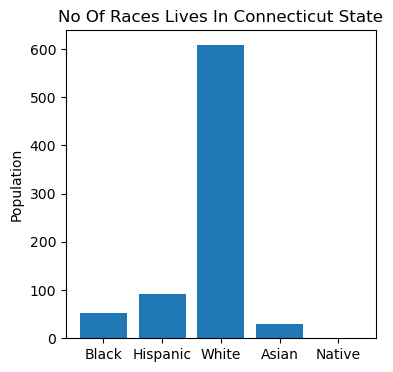

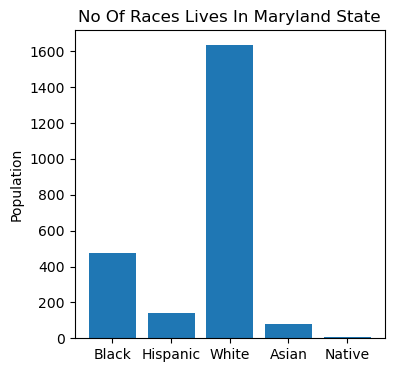

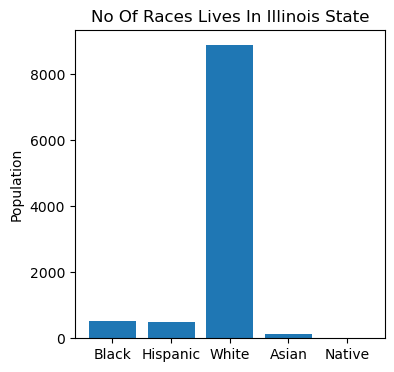

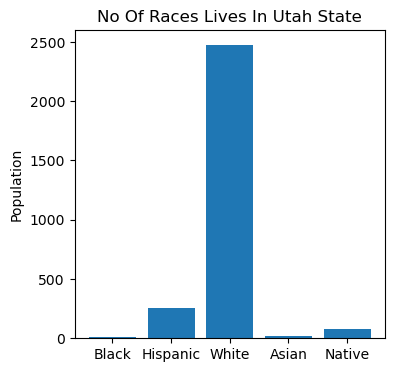

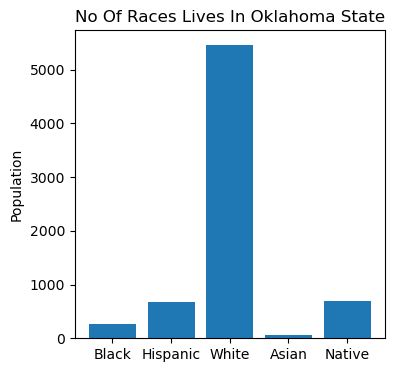

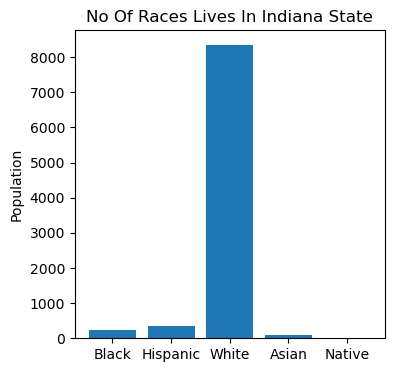

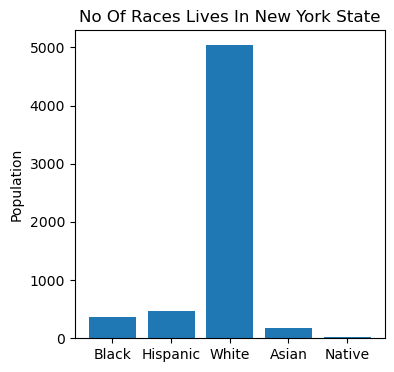

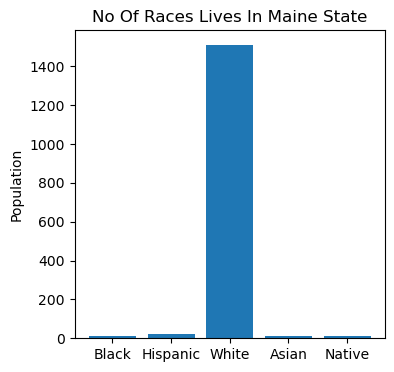

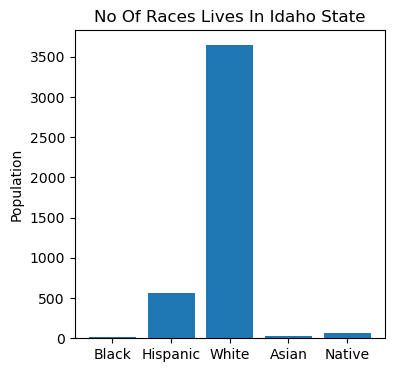

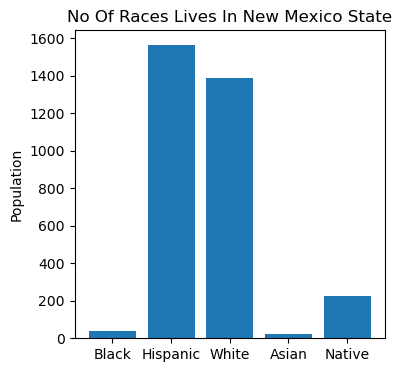

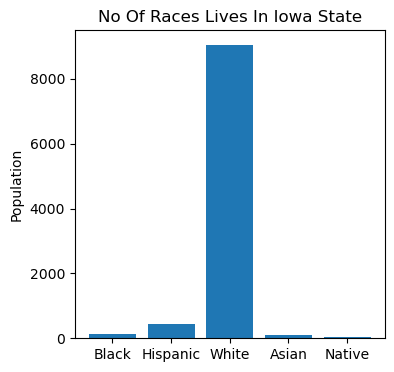

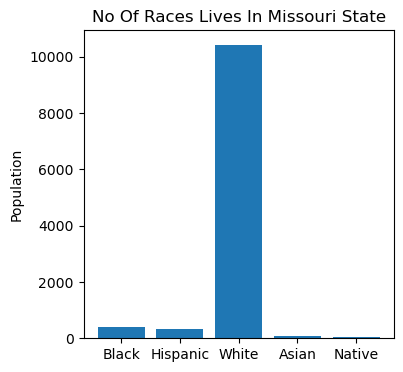

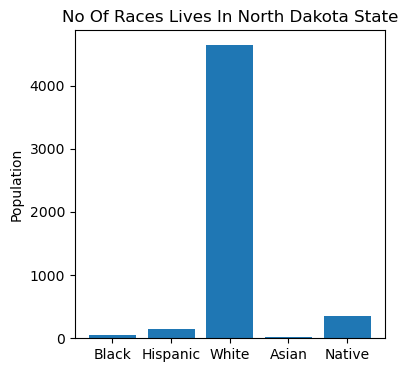

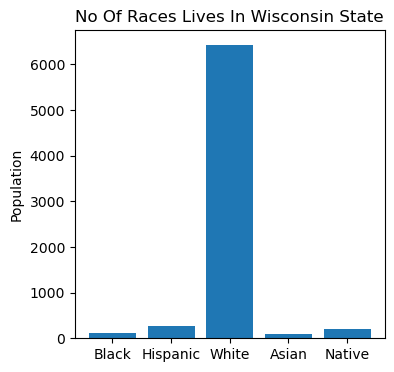

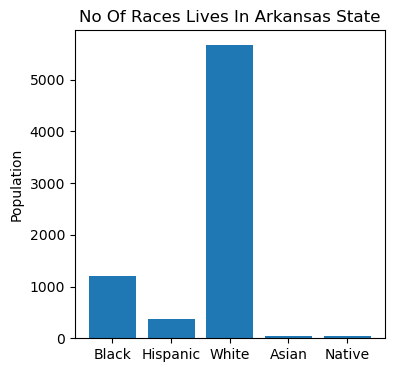

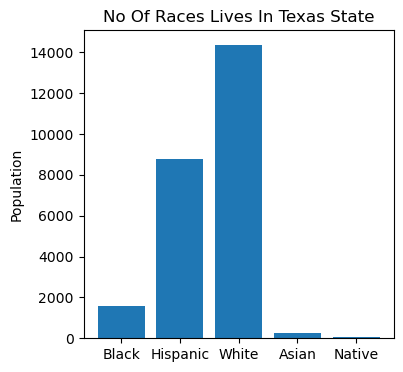

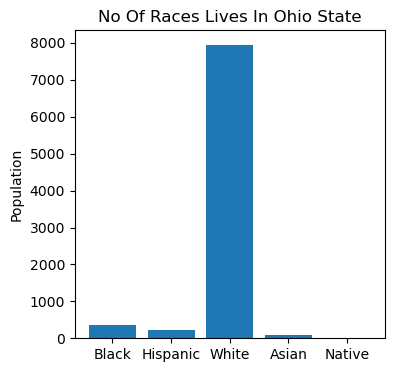

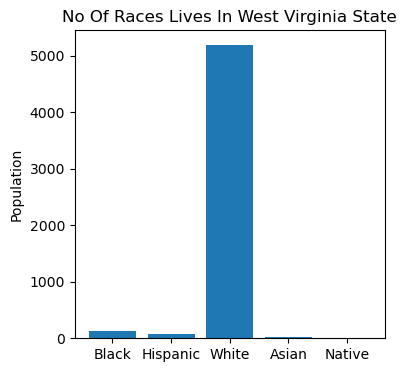

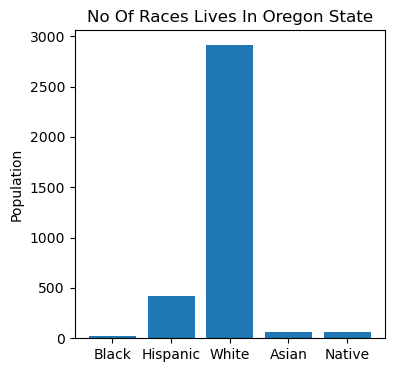

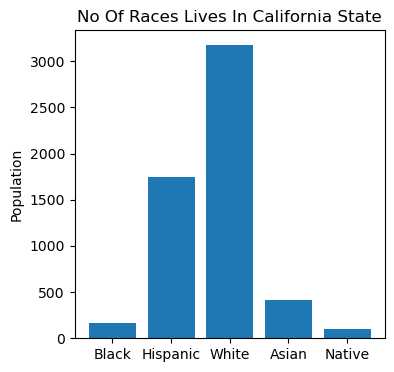

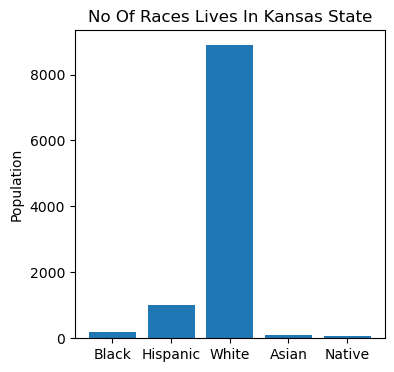

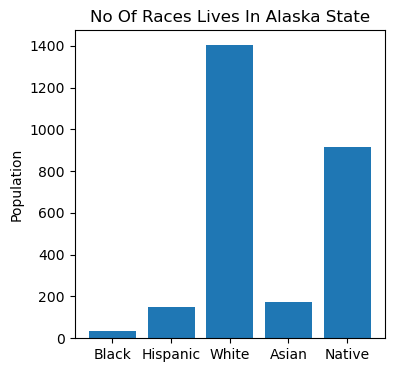

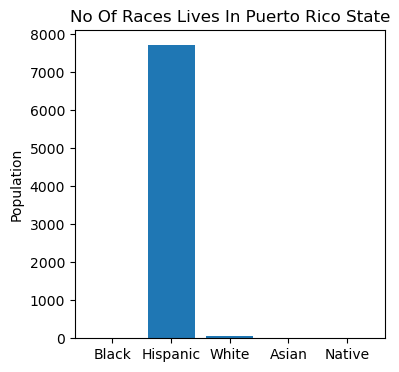

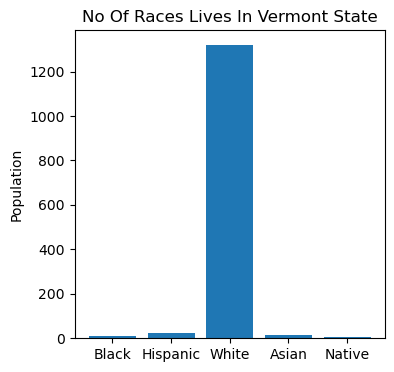

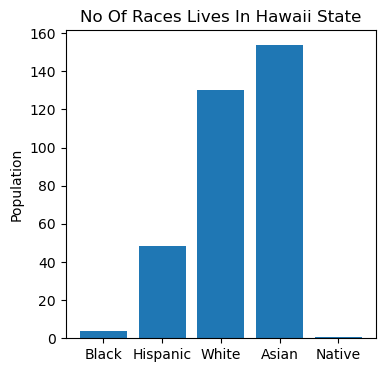

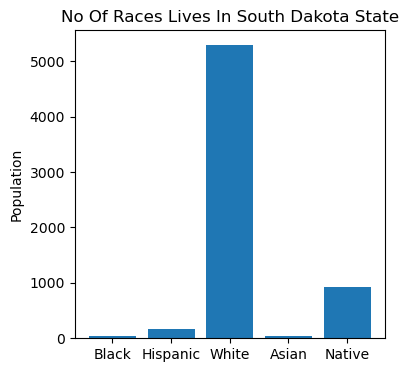

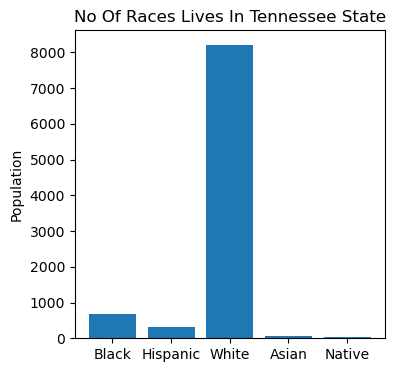

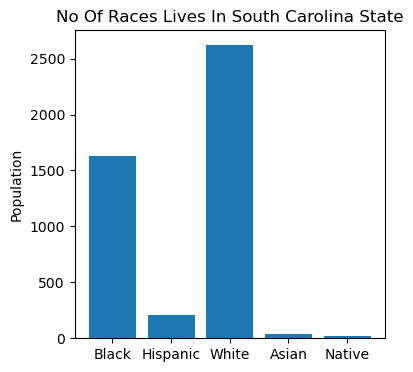

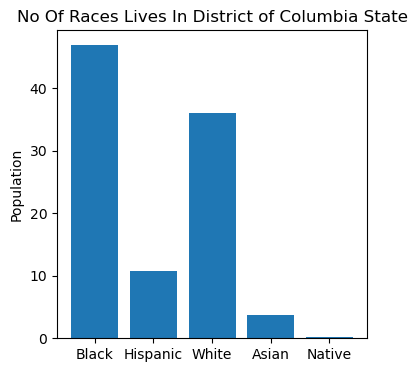

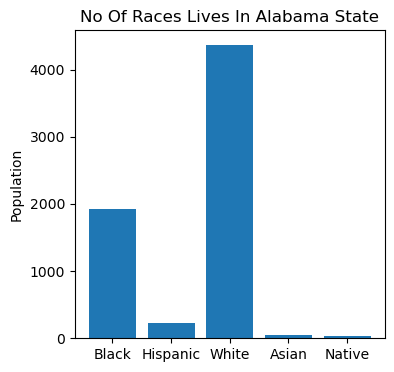

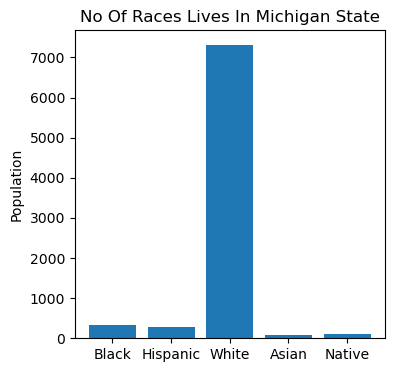

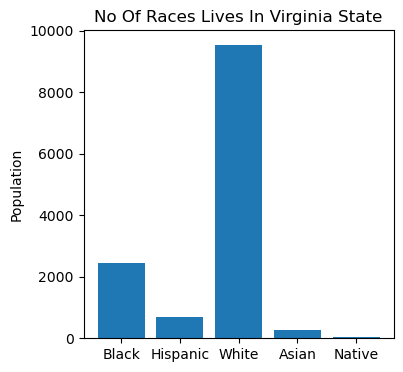

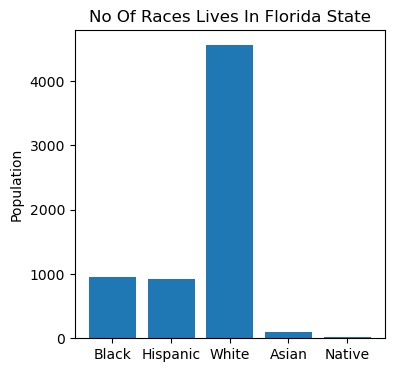

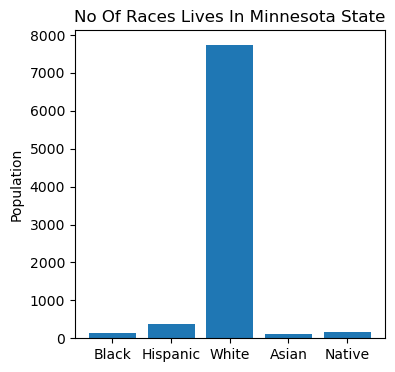

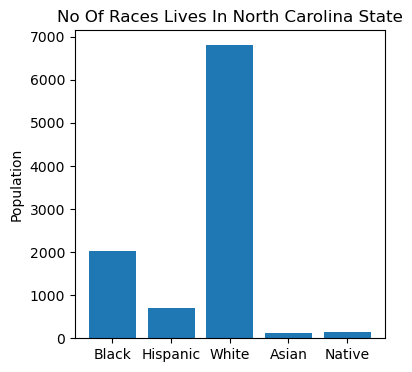

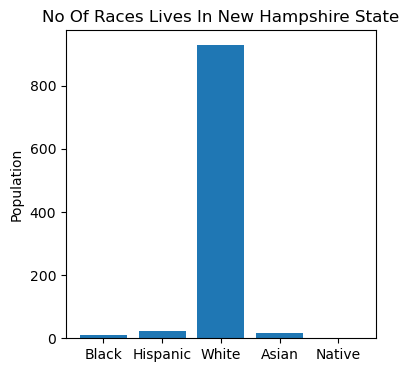

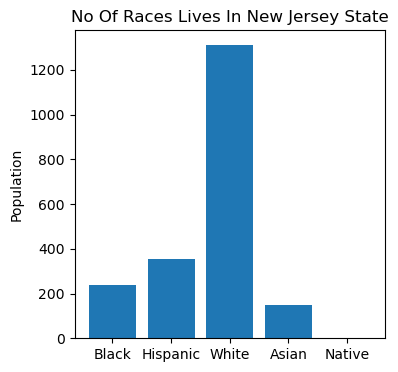

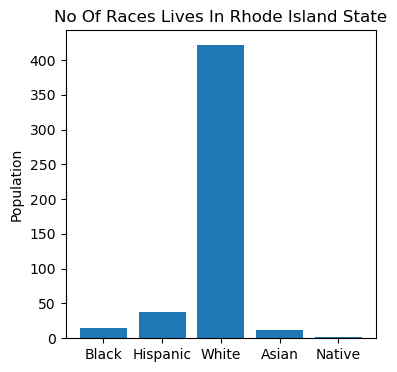

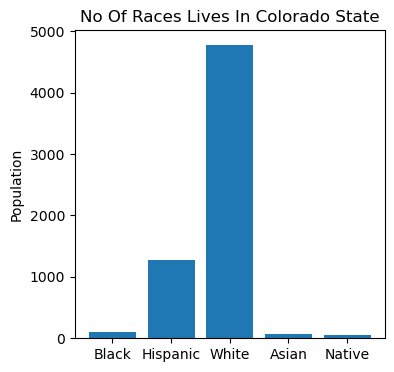

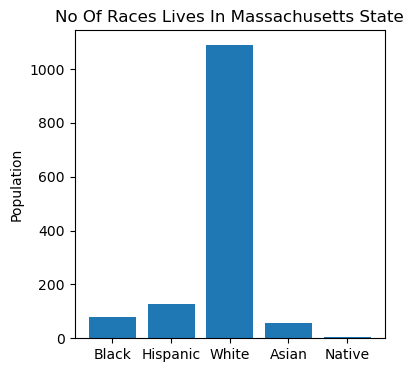

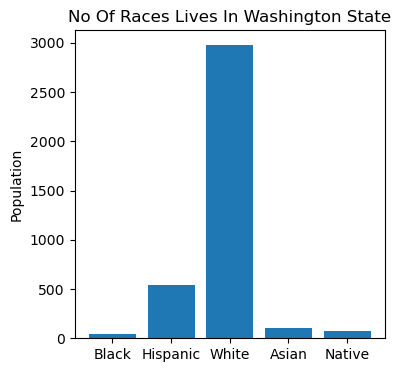

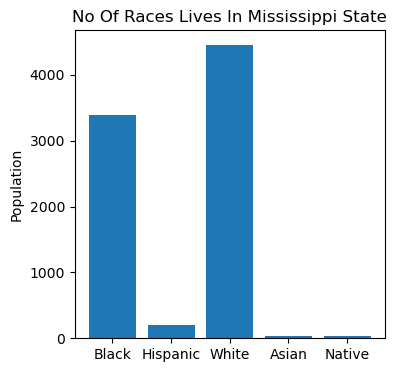

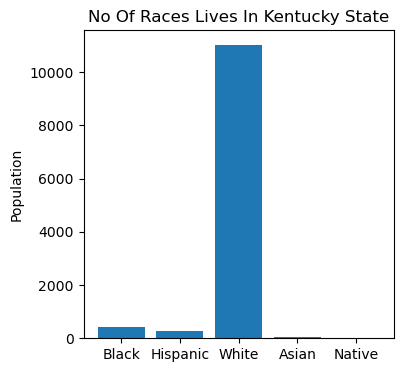

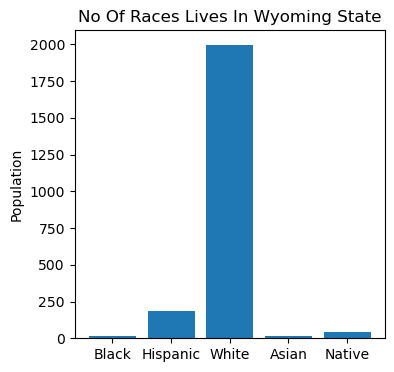

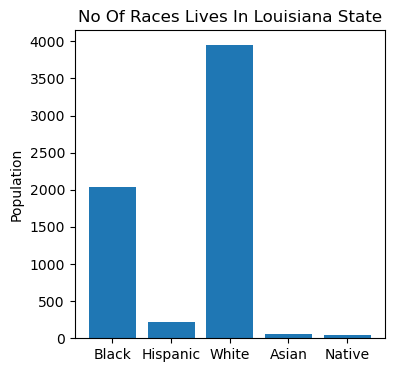

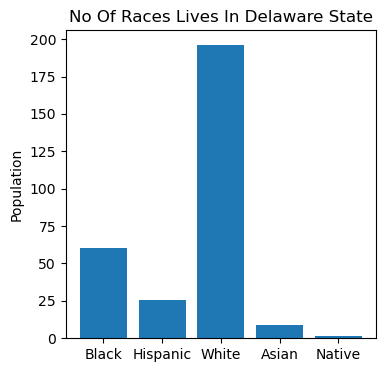

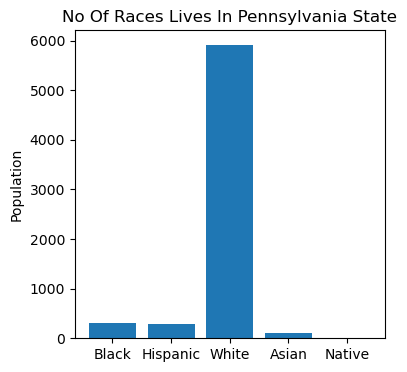

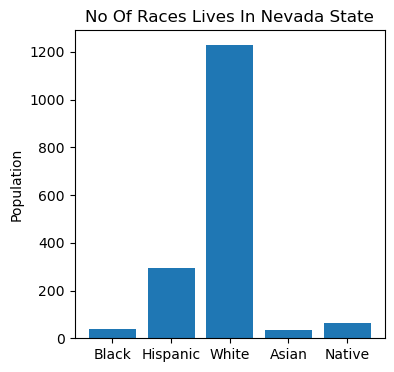

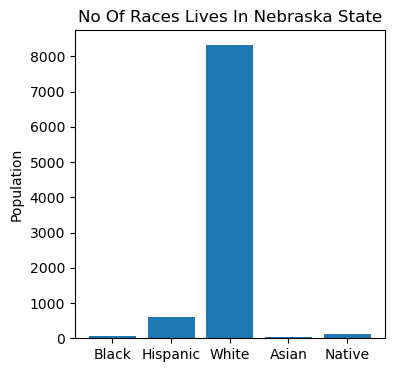

In [23]:
for i in states:
    temp2 = df[df["State"]==i]
    names = ["Black","Hispanic","White","Asian","Native"]
    total1 =[]

    total1.append(sum(temp2["Black"]))
    total1.append(sum(temp2["Hispanic"]))
    total1.append(sum(temp2["White"]))
    total1.append(sum(temp2["Asian"]))
    total1.append(sum(temp2["Native"]))

    plt.figure(figsize=(4,4)) 
    plt.bar(names, total1)
    plt.ylabel('Population')
    plt.title(f'No Of Races Lives In {i} State')


    plt.show()

    total1.clear()


# Races visualization by Pie Chart for whole Country

In [32]:
total_races_usa =[]

    
total_races_usa.append(sum(df["Black"]))
total_races_usa.append(sum(df["Hispanic"]))
total_races_usa.append(sum(df["White"]))
total_races_usa.append(sum(df["Asian"]))
total_races_usa.append(sum(df["Native"]))
    

In [33]:

names = ["Black","Hispanic","White","Asian","Native"]


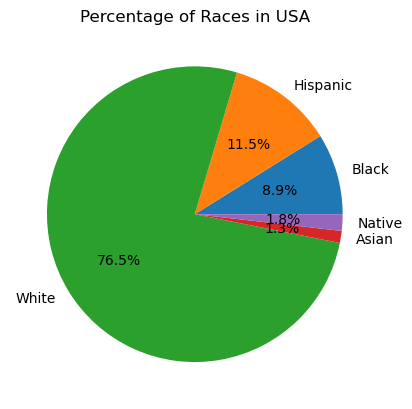

In [37]:
plt.title("Percentage of Races in USA")
plt.pie(total_races_usa,labels=names,autopct='%1.1f%%')
plt.show()

# Voting Citizen in each State

In [135]:

total2 = []

for i in states:
    temp3 = df[df["State"]==i]
    total2.append(sum(temp3['VotingAgeCitizen']))


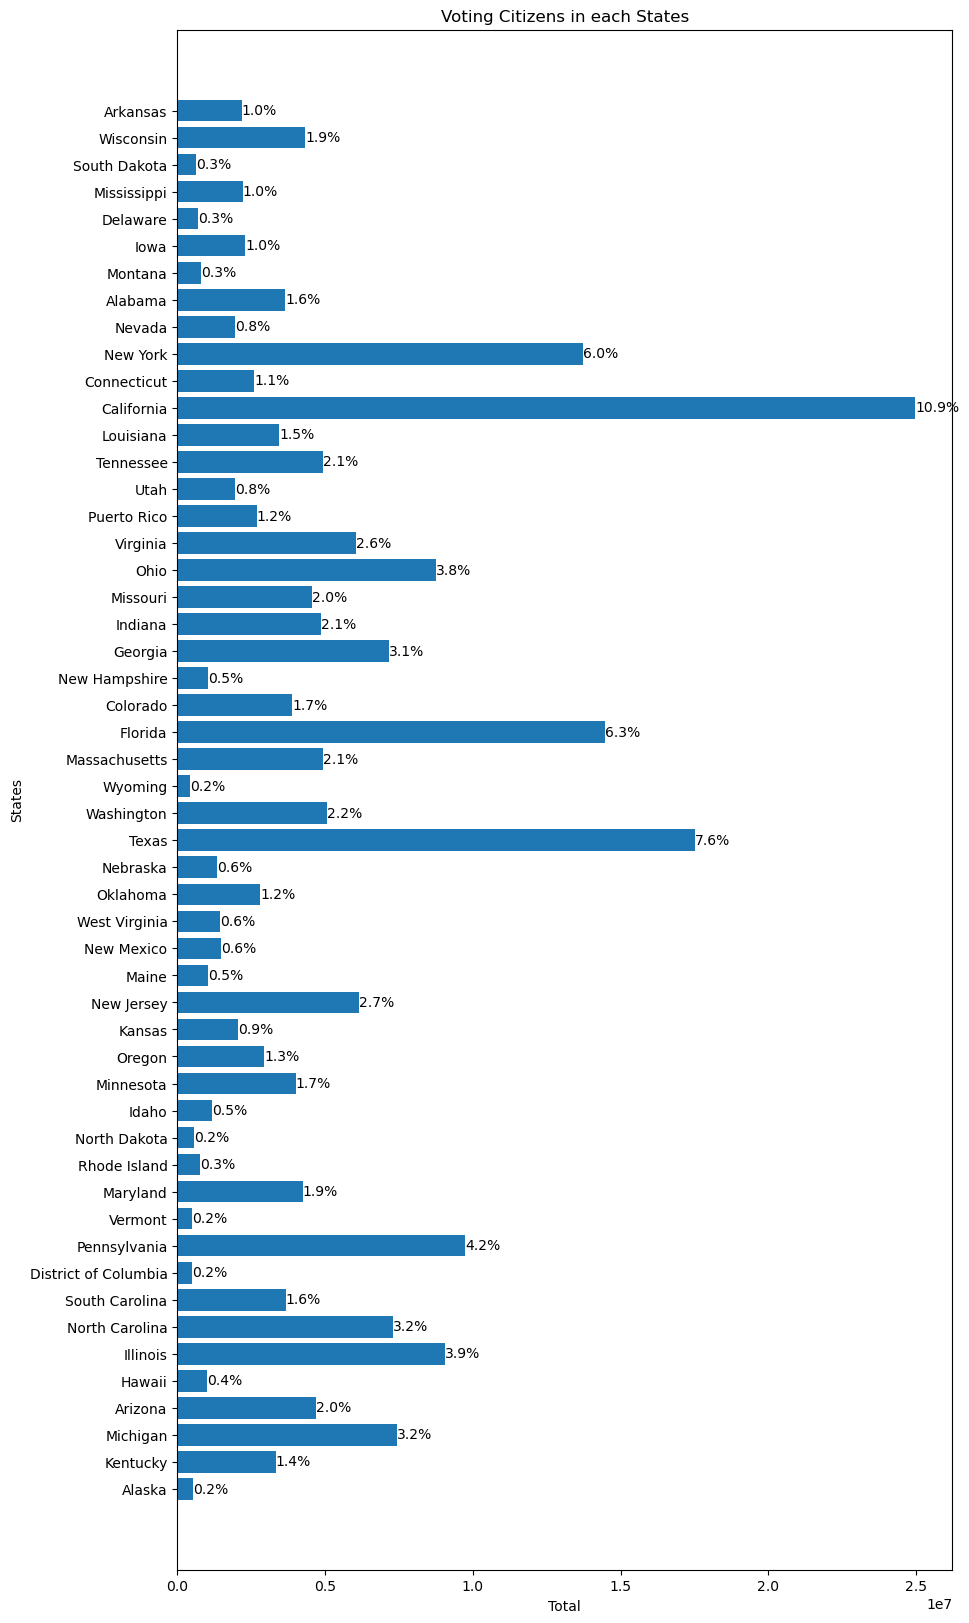

In [137]:
plt.figure(figsize=(10, 20))  # Adjust the figure size according to your preference

# Create the vertical bar plot
plt.barh(states, total2)

# Add percentage labels on top of each bar
for i, v in enumerate(total2):
    percentage = f'{(v/sum(total2) * 100):.1f}%'
    plt.text(v + 1, i, percentage, va='center')

plt.xlabel('Total')
plt.ylabel('States')
plt.title('Voting Citizens in each States')
plt.show()

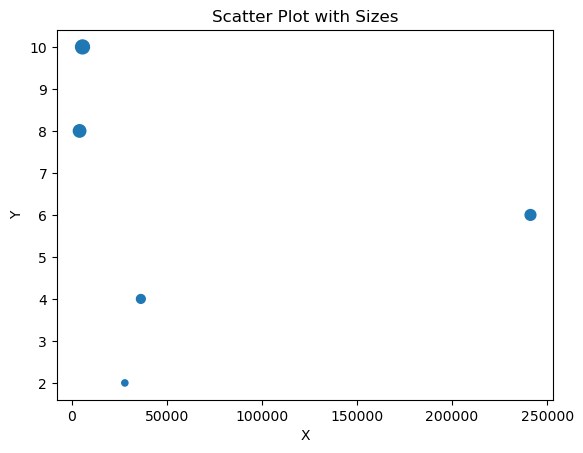

In [40]:
# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])
sizes = np.array([20, 40, 60, 80, 100])

# Create the scatter plot with varying sizes
plt.scatter(total_races_usa, y, s=sizes)

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Sizes')

# Display the plot
plt.show()